# Text Matching for Analytes

### This notebook details on a simple approach for text matching using Fuzzywuzzy package. It uses Levenshtein Distance to calculate the differences between sequences.
https://en.wikipedia.org/wiki/Levenshtein_distance

#### There are 4 way you can try text matching in Fuzzywuzzy.
#### Simple Ratio, Partial Ratio, Token Sort Ratio, Token Set Ratio

You can download and read more about Fuzzywuzzy from PyPI https://pypi.org/project/fuzzywuzzy/

#### Install Fuzzywuzzy package - pip install fuzzywuzzy

### Loading Packages

In [1]:
import os
import pandas as pd
from fuzzywuzzy import fuzz
os.chdir(r'C:\Users\rejid4996\OneDrive - ARCADIS\Arcadis Files\Project Files\text match')

#os.chdir(r'xxx\xxx\xxx') # make sure you are on the path 

### Reading the data and converting into list

In [2]:
df = pd.read_excel('compounds.xlsx')

compounds1 = list(df.iloc[:, 0])
compounds2 = list(df.iloc[:, 1])

compounds1 = [x for x in compounds1 if str(x) != 'nan']
compounds2 = [x for x in compounds2 if str(x) != 'nan']

### Using Token sort ratio to match two column values

In [3]:
compound1_match = []
compound2_match = []
for i in range(0, len(compounds1)):
    str1 = compounds1[i]
    for j in range(0, len(compounds2)):
        str2 = compounds2[j]
        Token_Sort_Ratio = fuzz.token_sort_ratio(str1,str2)
        if Token_Sort_Ratio > 80:
            compound1_match.append(compounds1[i])
            compound2_match.append(compounds2[j])

In [4]:
match_df = pd.DataFrame({'compound 1':compound1_match, 'compound 2':compound2_match})
match_df

,compound 1,compound 2
0,Ethylbenzene,Ethylbenzene
1,n-Propylbenzene,Isopropylbenzene
2,Methylcyclohexane,Methylcyclohexane
3,Cyclohexane,Cyclohexane
4,"1,3-Diethylbenzene","1,3-Dichlorobenzene"
5,"3-Pentanone, 2,4-dimethyl-",4-Methyl-2-pentanone (MIBK)
6,Cyclopropylbenzene,Isopropylbenzene
7,Isopropylbenzene,Isopropylbenzene


### Text Matching with HMNI

#### HMNI is a library which use Fuzzy name matching with machine learning. For more details please check out Christopher Thornton's repository https://github.com/Christopher-Thornton/hmni

pip install hmni # install the library

In [ ]:
import hmni

# Initialize a Matcher Object
matcher = hmni.Matcher(model='latin')

In [ ]:
df1 = pd.DataFrame({'name': ['Ethylbenzene', 'nPropylbenzene', 'Methylcyclohexane', 'Cyclopropylbenzene']})
df2 = pd.DataFrame({'name': ['Ethylbenzene', 'Isopropylbenzane', 'Isopropylbenzene', 'Methylcyclohexene']})

merged = matcher.fuzzymerge(df1, df2, how='left', on='name')

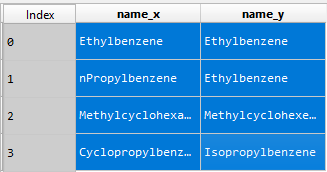